# Individual Planning Report - Randiv Adhihetty

### (1) Data Description

##### (1.a) players.csv

| Variable     | Data Type | Non-Null Count      | Mean     | Median | Standard Deviation | Min | Max   |
| ------------ | ----------| ------------------- | -------- | ------ | ------------------ | --- | ----- |
| experience   | character | 196                 | NA       | NA     | NA                 | NA  | NA    |
| subscribe    | boolean   | 196                 | NA       | NA     | NA                 | NA  | NA    |
| hashedEmail  | character | 196                 | NA       | NA     | NA                 | NA  | NA    |
| played_hours | double    | 196                 | 5.8459   | 0.1    | 28.3573            | 0.0 | 223.1 |
| name         | character | 196                 | NA       | NA     | NA                 | NA  | NA    |
| gender       | character | 196                 | NA       | NA     | NA                 | NA  | NA    |
| Age          | double    | 194 + (2 NA values) | 20.50206 | 19     | 6.1747             | 8   | 50    |

Descriptions:
- **Experiance**: Categorical names that indicate a player's experiance within Minecraft.
- **Subscribe**: A boolean indication of whether the player is subscribed to Minecraft (or owns a copy of Minecraft).
- **Hashed Email**: A unique hashed string used to identify players.
- **Played hours**: Total number of hours played by the player.
- **Name**: The players name.
- **Gender**: The players gender.
- **Age**: The player's age in years.

Issues:
- **Skewed hours**: The variable played_hours has skewed values as the median is 0.1 but the min and max being 0 and 223.1 respectively. 
- **Two Missing Age Values**: There are two players that have NAs for their age.

How Data was collected:
- The data was likely collected via a user registration form.


##### (1.b) sessions.csv

| Variable            | Data Type | Non-Null Count            | Mean     | Median   | Standard Deviation | Min      | Max      |
| --------------------| --------- | ------------------------- | -------- | ---------| ------------------ | ---------| ---------|
| hashedEmail         | character | 1535                      | NA       | NA       | NA                 | NA       | NA       |
| start_time          | character | 1535                      | NA       | NA       | NA                 | NA       | NA       |
| end_time            | character | 1533 + (2 missing values) | NA       | NA       | NA                 | NA       | NA       |
| original_start_time | double    | 1535                      | 1.719e12 | 1.719e12 | 3.557e9            | 1.712e12 | 1.727e12 |
| original_end_time   | double    | 1533 + (2 missing values) | 1.719e12 | 1.719e12 | 3.553e9            | 1.712e12 | 1.727e12 |

Descriptions:
- **Hashed Email**: A unique hashed string used to identify players.
- **Start Time**: The start time of the session in the format DD/MM/YYYY HH:MM.
- **End Time**: The end time of the session in the format DD/MM/YYYY HH:MM.
- **Original Start Time**: The start time of the session in Unix timestamp format. 
- **Original End Time**: The end time of the session in Unix timestamp format. 

Issues:
- **Original Start/End Time precision**: Unix time is not very precise, which may lead to some issues if used specifc calculations like getting the specific time of when a player ended a session.
- **Start/End Time Format**: In the current format (DD/MM/YYYY HH:MM), it would be dificlut to perform specific operations like filtering sessions from specifc months.
- **Two missing End Time and Original End Time Values**: There are two sessions that are missing their end_time and original_end_time values.

How Data was collected:
- The data was likely collected via an event loggin system that tracks when a user logs in and logs off.

### (2) Questions

**Broad Question**: We would like to know which "kinds" of players are most likely to contribute a large amount of data so that we can target those players in our recruiting efforts.

**Specific Question**: Can age, gender, and experiance in players predict played_hours in players?

**How this can be answered**: Running a regression model with played_hours as the dependent variable and age, gender and experiance as the independent variable.

**Wrangling data**:
- Since there are two missing age values, those two players should be dropped.
- If we wanted to look at age groups (eg 10-15,16-20, etc), then we should categorize them by grouping them into specific age ranges that we are intrested in.



### (3) Exploratory Data Analysis and Visualization

In [2]:
library(tidyverse)
library(repr)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


mean_played_hours,mean_player_age
<dbl>,<dbl>
5.904639,20.52062


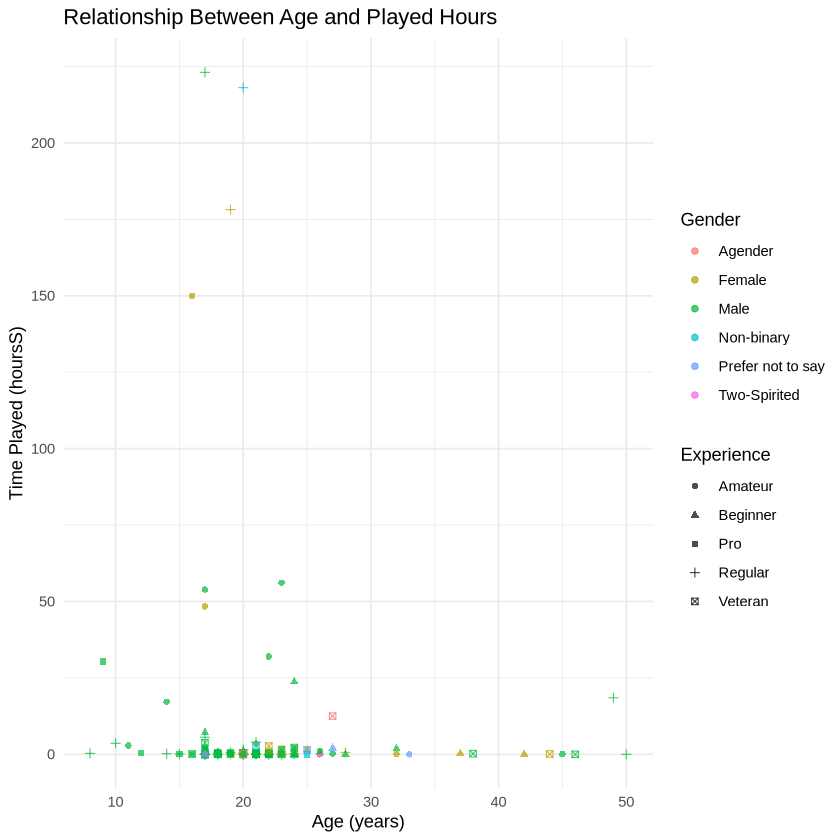

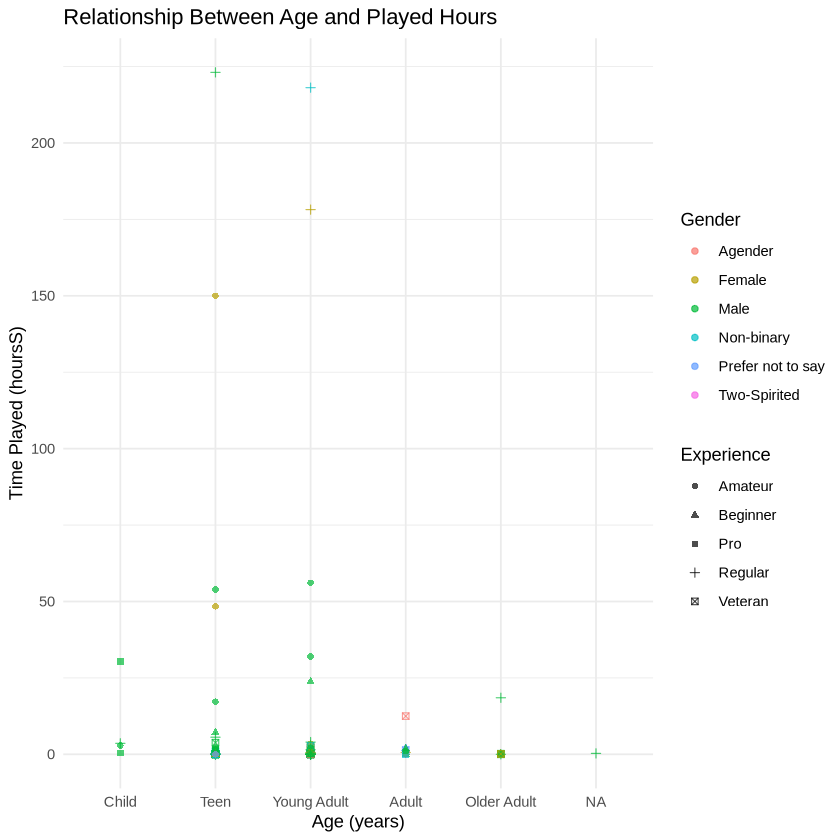

In [6]:
#Read in data
download.file("https://raw.githubusercontent.com/RandivAd/DSCI-Project/refs/heads/main/data/players.csv", "players.csv")
players <- read_csv("data/players.csv")
#I don't need sessions for my question but I'll load it just incase it's needed for grading
download.file("https://raw.githubusercontent.com/RandivAd/DSCI-Project/refs/heads/main/data/sessions.csv", "sessions.csv")
sessions <- read_csv("data/sessions.csv")
#Remove players with na values
players <- players |>
  filter(!is.na(Age))

#Add new col for age groups
players <- players |>
    mutate(age_group = cut(
        Age,
        breaks = c(8, 12, 17 ,24 ,34, Inf),
        labels = c("Child", "Teen", "Young Adult", "Adult", "Older Adult")
    ))

#Get means of quantitative variables in players

players_played_hours <- players |>
    pull(played_hours)

players_age <- players |>
    pull(Age)

mean_played_hour <- mean(players_played_hours, na.rm = TRUE)
mean_age <- mean(players_age, na.rm = TRUE)

mean_tibble <- tibble(mean_played_hours = mean_played_hour,
                     mean_player_age = mean_age)

mean_tibble

#Exploratory visualizations

#Age
ggplot(players, aes(x = Age, y = played_hours)) +
  geom_point(alpha = 0.7, aes(color = gender, shape = experience)) +
  labs(title = "Relationship Between Age and Played Hours",
        x = "Age (years)",
        y = "Time Played (hoursS)",
        color = "Gender",
        shape = "Experience"
      ) +
  theme_minimal()

#age_group
ggplot(players, aes(x = age_group, y = played_hours)) +
  geom_point(alpha = 0.7, aes(color = gender, shape = experience)) +
  labs(title = "Relationship Between Age and Played Hours",
        x = "Age (years)",
        y = "Time Played (hoursS)",
        color = "Gender",
        shape = "Experience"
      ) +
  theme_minimal()

Insights from the graph:
- Most play time would be in the age range of 15 - 26
- The outliers seem to have an experience level of "regular"
- When it comes to the outliers, gender doesn't matter much.

### (4) Methods and Plan

Method: Regression with multiple predictors

Why is this method appropriate?
- It handles both numeric and categorical precitors

Which assumptions are required, if any, to apply the method selected?
- We assume that there is some kind of relationship between the predictors and played hours

What are the potential limitations or weaknesses of the method selected?
- The played_hours outliers could infludence the regression fit (it could skew the result)

How are you going to compare and select the model?
- Using cross-validation.

How are you going to process the data to apply the model? For example: Are you splitting the data? How?
- Clean the data by removing players with NA values
- Possibly remove outliers if regression is extremly skewed by it
- split the data into ~75% training split and ~25% testing split